In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

data = pd.read_csv('AKN AI dataset.csv')
data

,charName,itemLevel,rosterLevel,strongholdLevel,engravings,gems,cards,specialEquipment,mokokoBuff,result
0,Kekikci,1500,162,70,5,9,1,1,0,Human
1,Lgmxpqqhqcahnd,1325,30,1,0,0,0,0,1,Bot
2,Inmpsjjnrce,1325,30,1,0,0,0,0,1,Bot
3,Tandhir,1378,82,35,3,11,0,1,1,Human
4,Al1sica,1345,69,24,2,11,1,1,1,Human
...,...,...,...,...,...,...,...,...,...,...
145,Katannya,1371,113,45,2,5,1,1,0,Human
146,Iambaddie,1416,155,65,3,8,1,1,0,Human
147,Xxxxfelix,1505,200,70,5,11,1,1,0,Human
148,Buldoscrapper,1495,215,70,5,11,1,1,0,Human


Imported the dataset and necessary libraries.

In [3]:
data = data.drop(columns=['charName', 'cards', 'specialEquipment', 'mokokoBuff'])
feature_names = ['itemLevel', 'rosterLevel', 'strongholdLevel', 'engravings', 'gems', 'cards', 'result']
data

,itemLevel,rosterLevel,strongholdLevel,engravings,gems,result
0,1500,162,70,5,9,Human
1,1325,30,1,0,0,Bot
2,1325,30,1,0,0,Bot
3,1378,82,35,3,11,Human
4,1345,69,24,2,11,Human
...,...,...,...,...,...,...
145,1371,113,45,2,5,Human
146,1416,155,65,3,8,Human
147,1505,200,70,5,11,Human
148,1495,215,70,5,11,Human


I used the <i>data.drop()</i> method is to remove several columns from the data set, specifically the columns with the names <i>'charName'</i>, <i>'cards'</i>, <i>'specialEquipment'</i>, and <i>'mokokoBuff'</i>. This method returns a new data set with those columns removed, which is then assigned back to the data variable.<br><br>
After the columns are dropped from the data set, I created a new list of feature names and assigned to the <i>feature_names</i> variable. This list contains the names of the columns that remain in the data set after the specified columns are dropped.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,itemLevel,rosterLevel,strongholdLevel,engravings,gems
count,150.00,150.00,150.00,150.00,150.00
mean,1377.81,78.75,23.23,1.84,4.46
std,87.26,54.71,26.47,2.02,5.12
min,1100.00,26.00,1.00,0.00,0.00
25%,1323.25,32.00,1.00,0.00,0.00
50%,1361.50,40.00,5.50,1.00,0.00
75%,1451.50,124.00,45.00,4.00,11.00
max,1565.00,215.00,70.00,5.00,16.00


The <i>describe()</i> method generates a summary of the data set, including the count, mean, standard deviation, minimum, maximum, and quartile values for each column of numeric data in the data set.

<b>itemLevel</b> = Main level of the player's current character.<br>
<b>rosterLevel</b> = As the player gains xp on any of their characters, roster level is increased.<br>
<b>strongholdLevel</b> = Player's home level. Can be increased by doing researchs.<br>
<b>engravings</b> = How many engravings current character equipped.<br>
<b>gems</b> = How many gems current character equipped.

In [5]:
data.groupby('result').size()

result
Bot      75
Human    75
dtype: int64

Number of humans and bots in my dataset.

In [6]:
data.groupby('result').mean()

,itemLevel,rosterLevel,strongholdLevel,engravings,gems
result,,,,,
Bot,1311.91,33.17,1.16,0.01,0.00
Human,1443.72,124.33,45.29,3.67,8.92


This line groups the rows in my data set by the values in the <i>'result'</i> column, calculates the mean of each group, and then displays the resulting values.

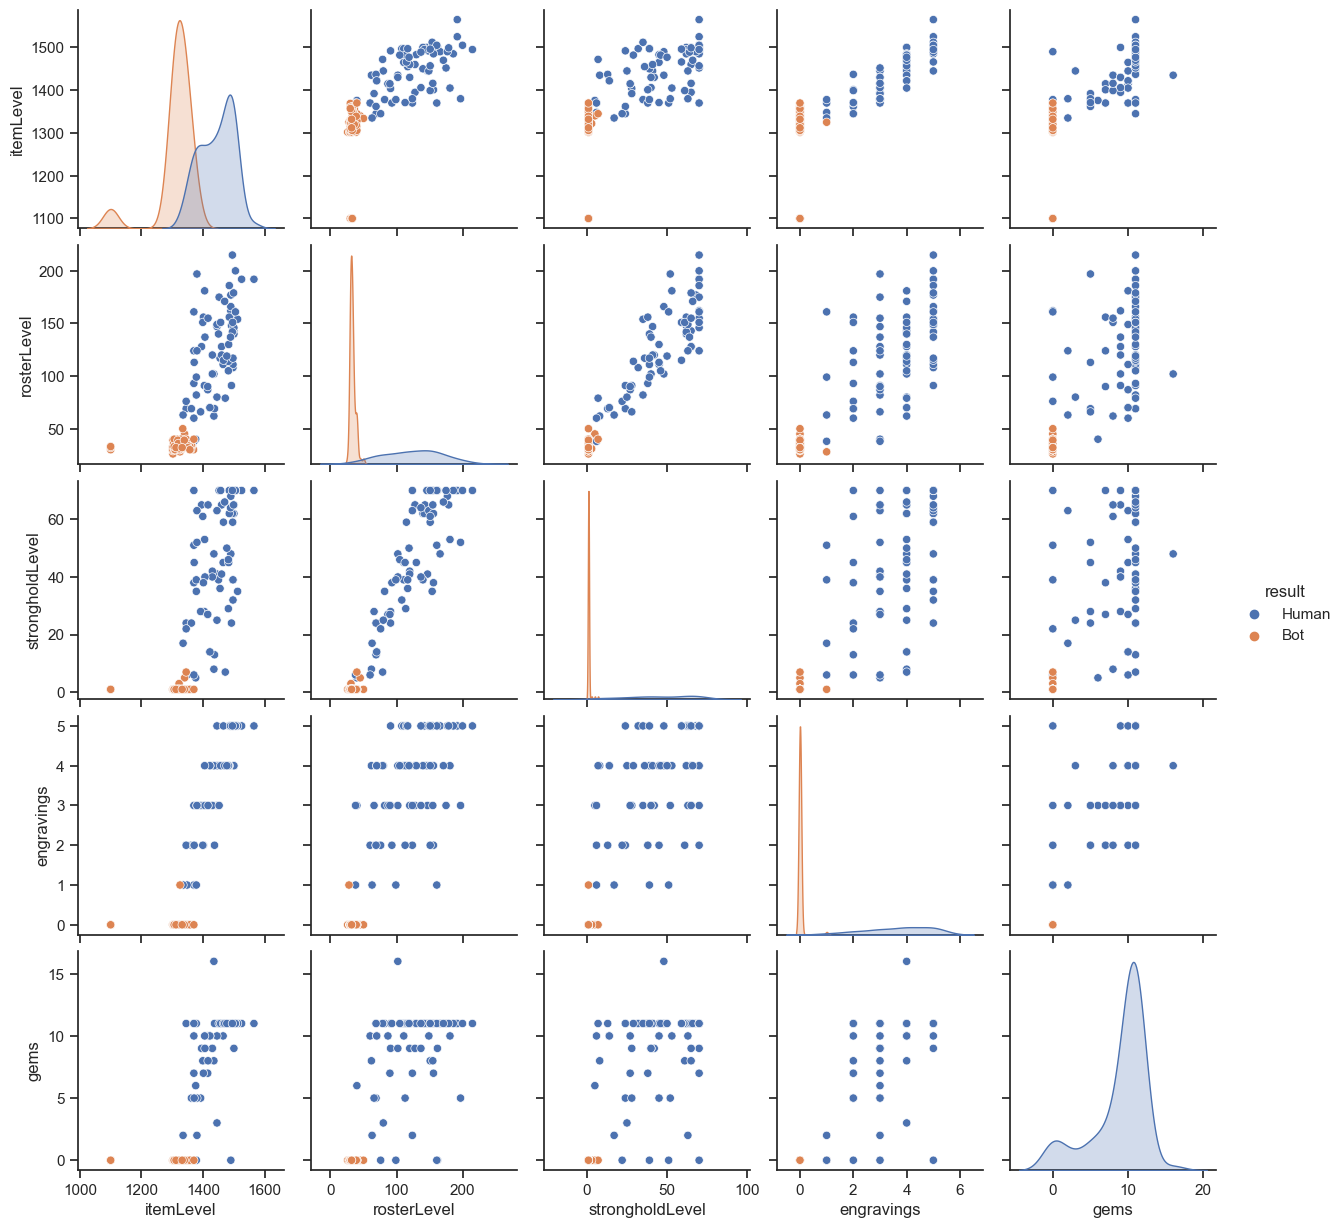

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 9,6


sns.set(style = 'ticks')

sns.pairplot(data, hue = 'result')
plt.show()

Created a pairplot of my data set, with a different color for each unique value in a specified column.<br><br>
The <i>pairplot()</i> method creates a grid of scatter plots showing the relationship between each pair of variables in the data set.<br><br>
We can see here that the lower the itemLevel and rosterLevel, Also close to zero amount of engravings and gems shows that it's more likely a bot.

The best k value is 1


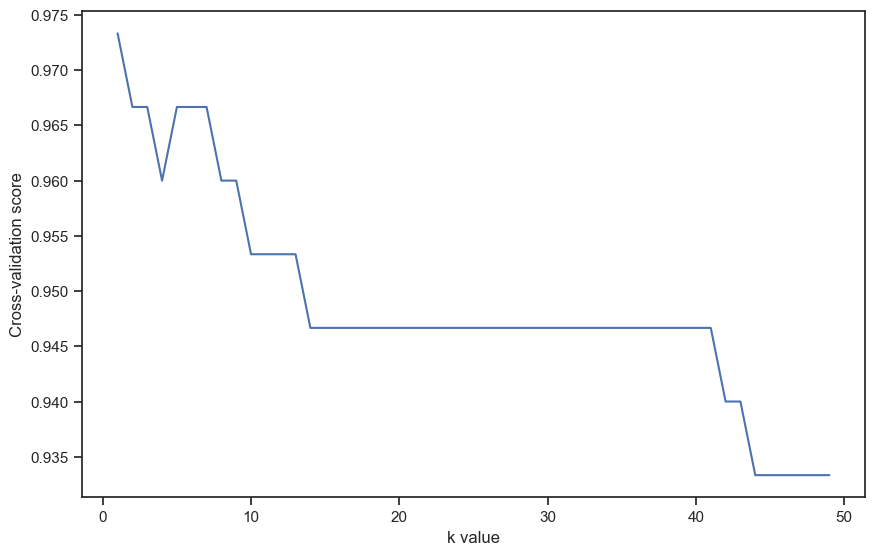

In [8]:
X = data.drop('result', axis=1)
y = data['result']

k_values = range(1,50)
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    cv_scores.append(np.mean(scores))

plt.plot(k_values, cv_scores)
best_index = np.argmax(cv_scores)

# Get the corresponding k value
best_k = k_values[best_index]

# Print the best k value
print(f"The best k value is {best_k}")
# Add labels to the x and y axes
plt.xlabel("k value")
plt.ylabel("Cross-validation score")

# Show the plot
plt.show()

Performed k-nearest neighbors classification on my data set, and then used cross-validation to evaluate the performance of the model at different values of k.<br><br>
First, the <i>X</i> and <i>y</i> variables are defined by splitting the data set into features and labels. The <i>X</i> variable is assigned the result of calling the <i>drop()</i> method on the <i>data</i> variable, passing <i>'result'</i> as the argument to specify the column to drop. This results in a new DataFrame object with the <i>'result'</i> column removed, which contains the feature data for the data set. The <i>y</i> variable is assigned the <i>'result'</i> column of the <i>data</i> variable, which contains the labels for the data set.<br><br>
Next, the <i>k_values</i> variable is defined as a range of values from 1 to 50, which will be used as the values of k for the k-nearest neighbors model. The <i>cv_scores</i> variable is defined as an empty list, which will be used to store the cross-validation scores for each value of k.<br><br>
Finally I showed the k values and their cross-validation scores in a chart.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[['itemLevel', 'rosterLevel', 'strongholdLevel', 'engravings', 'gems']], data['result'], test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)

print('Accuracy: %.2f' % accuracy)

print(knn.predict([[1495, 131, 55, 4, 10]]))
print(knn.predict([[1320, 100, 55, 4, 10]]))
print(knn.predict([[1325, 35, 3, 0, 0]]))

Accuracy: 0.93
['Human']
['Human']
['Bot']


The code first splits the data into training and test sets using the <i>train_test_split()</i> function. The training set is used to train the KNN model, and the test set is used to evaluate its accuracy. The model is trained with the <i>fit()</i> method, and its accuracy is determined by calling the <i>score()</i> method and passing in the test data. I also used the trained model to make predictions on three manually given data using the <i>predict()</i> method.

In [11]:
Y_pred = knn.predict(X_test)

print('Confusion Matrix for KNN Model:')
confusion_mat = pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
from IPython.display import display
display(confusion_mat)

from sklearn.metrics import classification_report
cr = classification_report(y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
print('Classification report:\n',cr)

accuracy_train = knn.score(X_train,y_train)
accuracy_test = knn.score(X_test,y_test)
print('Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))

Confusion Matrix for KNN Model:


Predicted,Bot,Human,All
Actual,,,
Bot,13,1,14
Human,2,29,31
All,15,30,45


Classification report:
               precision    recall  f1-score   support

         Bot       0.87      0.93      0.90        14
       Human       0.97      0.94      0.95        31

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45

Accuracy on train and test datasets: 1.0000 and 0.9333


I'm using KNN to make predictions on some test data <i>X_test</i> and then evaluating the performance of the model using a confusion matrix, classification report, and overall accuracy on the test and train datasets.

The <i>knn.predict</i> function is used to generate predictions on the test data and store them in <i>Y_pred</i>. The <i>pd.crosstab</i> function is then used to create a confusion matrix, which is a table that shows the number of correct and incorrect predictions made by the model on each class in the test data.

Next, I used the <i>classification_report</i> function to generate a detailed report on the performance of the model, including precision, recall, f1-score, and support for each class. Finally, I used the <i>knn.score</i> function to calculate the accuracy of the model on both the train and test datasets.